# scikit-learn中的PCA中的功能

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
data = datasets.load_digits()        #手写数字

In [3]:
data.keys()

dict_keys(['target', 'data', 'images', 'DESCR', 'target_names'])

In [4]:
data.data.shape

(1797, 64)

In [5]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
data.images.shape

(1797, 8, 8)

In [9]:
X = data.data
y = data.target

In [25]:
#进行训练和测试数据集的切分
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)

In [26]:
X_train.shape

(1437, 64)

In [29]:
%%time 
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

Wall time: 86.2 ms


In [30]:
knn.score(X_test,y_test)

0.98888888888888893

In [31]:
#使用我们的scikit-lenrn的RPC

In [32]:
#分解
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)    #几个主成分

In [35]:
#将数据进行将维
pca.fit(X_train)
#取出将维后的数据
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [37]:
#看用将维后的数据进行分类训练耗费的时间
%%time
knn_clf = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn_clf.fit(X_train_reduction,y_train)

Wall time: 3.01 ms


In [39]:
knn_clf.score(X_test_reduction,y_test)

0.60555555555555551

In [22]:
#我们原本的64维的信息我们降到了2维的信息   我们的准确率的识别精度确降低了
#那么我们怎么选取我们的具体的维数信息呢？

(20, 64)

In [40]:
#第一种方法是使用网格搜索的方法
param_grid =[
    {  
        'n_components':[i for i in range(1,64)],   
    }
]

In [45]:
pca =PCA()

In [46]:
#调用网格方法    CV代表交叉验证  cross validation
from sklearn.model_selection import GridSearchCV
#第一个参数为我们的机器学习的算法    第二个参数为我们写出的网格函数
#定义我们网格搜索的对象
grid_search = GridSearchCV(pca,param_grid)

In [47]:
%%time
grid_search.fit(X_train)

Wall time: 5.19 s


d:\python\lib\site-packages\sklearn\model_selection\_search.py:675: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


GridSearchCV(cv=None, error_score='raise',
       estimator=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
#返回我们搜索到的最佳的分类器
grid_search.best_estimator_

PCA(copy=True, iterated_power='auto', n_components=54, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
#返回我们分类器的下标
grid_search.best_index_

53

In [58]:
#分类器的精度
grid_search.best_score_

-117.92032082356542

In [60]:
#返回我们对应的参数
grid_search.best_params_

{'n_components': 54}

In [61]:
pca = grid_search.best_estimator_

In [66]:
X_train_1=pca.transform(X_train)
X_test_1=pca.transform(X_test)

In [94]:
knn_clf.fit(X_train_1,y_train)
knn_clf.score(X_test_1,y_test)

0.98888888888888893

In [71]:
#第二种方法是我们的PCA中自带的，我们只需要指定我们的准确度达到百分之多少
pca.explained_variance_ratio_
#代表的是解释的比例  第一个轴可以解释多少  第二个周可以解释多少   加和等于
#总共的解释的比例             从大到小依次排列

array([  1.45064600e-01,   1.37142456e-01,   1.19680004e-01,
         8.43768923e-02,   5.87005941e-02,   5.01797333e-02,
         4.34065700e-02,   3.61375740e-02,   3.39661991e-02,
         3.00599249e-02,   2.38906921e-02,   2.29417581e-02,
         1.81335935e-02,   1.78403959e-02,   1.47411385e-02,
         1.41290045e-02,   1.29333094e-02,   1.25283166e-02,
         1.01123057e-02,   9.08986879e-03,   8.98365069e-03,
         7.72299807e-03,   7.62541166e-03,   7.09954951e-03,
         6.96433125e-03,   5.84665284e-03,   5.77225779e-03,
         5.07732970e-03,   4.84364707e-03,   4.34595748e-03,
         3.73352381e-03,   3.57655938e-03,   3.30727680e-03,
         3.18129431e-03,   3.06969704e-03,   2.89170006e-03,
         2.51205204e-03,   2.27743660e-03,   2.22760483e-03,
         2.00065017e-03,   1.89529684e-03,   1.56877138e-03,
         1.42740894e-03,   1.39115781e-03,   1.20896097e-03,
         1.10149976e-03,   9.81702199e-04,   8.82376601e-04,
         5.69898729e-04,

In [73]:
#
pca1 =PCA(n_components=X_train.shape[1])
pca1.fit(X_train)
pca1.explained_variance_ratio_
#代表的是我们的64个主成分分别可以解释我们的方差的百分比  从大到小

array([  1.45064600e-01,   1.37142456e-01,   1.19680004e-01,
         8.43768923e-02,   5.87005941e-02,   5.01797333e-02,
         4.34065700e-02,   3.61375740e-02,   3.39661991e-02,
         3.00599249e-02,   2.38906921e-02,   2.29417581e-02,
         1.81335935e-02,   1.78403959e-02,   1.47411385e-02,
         1.41290045e-02,   1.29333094e-02,   1.25283166e-02,
         1.01123057e-02,   9.08986879e-03,   8.98365069e-03,
         7.72299807e-03,   7.62541166e-03,   7.09954951e-03,
         6.96433125e-03,   5.84665284e-03,   5.77225779e-03,
         5.07732970e-03,   4.84364707e-03,   4.34595748e-03,
         3.73352381e-03,   3.57655938e-03,   3.30727680e-03,
         3.18129431e-03,   3.06969704e-03,   2.89170006e-03,
         2.51205204e-03,   2.27743660e-03,   2.22760483e-03,
         2.00065017e-03,   1.89529684e-03,   1.56877138e-03,
         1.42740894e-03,   1.39115781e-03,   1.20896097e-03,
         1.10149976e-03,   9.81702199e-04,   8.82376601e-04,
         5.69898729e-04,

In [74]:
import matplotlib.pyplot as plt

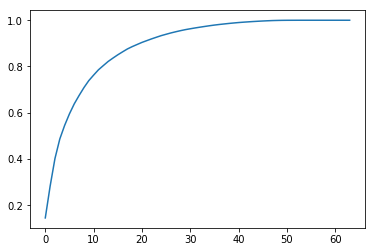

In [85]:
#横轴代表的使我们的64个维度
#纵轴代表的使我们的64各维度分别可以解释的方差的白分比的和
plt.plot([i for i in range(X_train.shape[1])],
#         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])]
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(pca1.explained_variance_ratio_.size)]

        )
plt.show()

In [86]:
#看图的分析   可以得到   在30的时候我们的解释度就很高了

In [87]:
#假如说我们需要找到95%
pca2 = PCA(0.95)

In [88]:
pca2.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [90]:
pca2.n_components_

28

In [91]:
X_train_reduction = pca2.transform(X_train)
X_test_reduction = pca2.transform(X_test)

In [92]:
%%time 
knn2 = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn2.fit(X_train_reduction,y_train)

Wall time: 8.02 ms


In [95]:
knn2.score(X_test_reduction,y_test)

0.98333333333333328

In [96]:
#可以看我们的精度   如果说我们用全样本需要耗费10天   但是如果用我们的PCA进行将维
#只需要1天  但是我们仅仅损失了  0.05的精度   那么我们完全是可以接受的

In [97]:
#我们对数据进行降维还有一个更重要的因素  就是为了可视化

In [98]:
pca3 = PCA(n_components=2)
pca3.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [101]:
X_t = pca3.transform(X_train)
X_t.shape

(1437, 2)

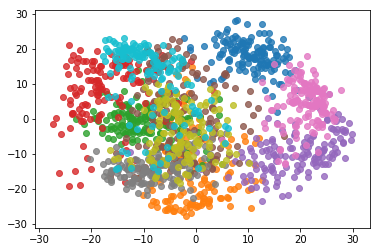

In [106]:
#开始进行绘制    绘制的时候是将每一个数字的点花在图上
for  i in range(10):
    plt.scatter(X_t[y_train==i,0],X_t[y_train==i,1],alpha=0.8)
plt.show()

In [ ]:
#我们可以想象  如果只需要区分红色的和蓝色的这个维度   那么我们只需要选取2维的
#维度就够了